In [208]:
import itertools
from sklearn import metrics
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.losses import MeanSquaredError
# from tensorflow.python.keras.metrics import RootMeanSquaredError
# from tensorflow.python.keras.layers import Dense, Dropout
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [209]:
df.shape

(5110, 12)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [211]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [212]:
df.describe()
## %

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [213]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [214]:
df = df.dropna()

In [215]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
               'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

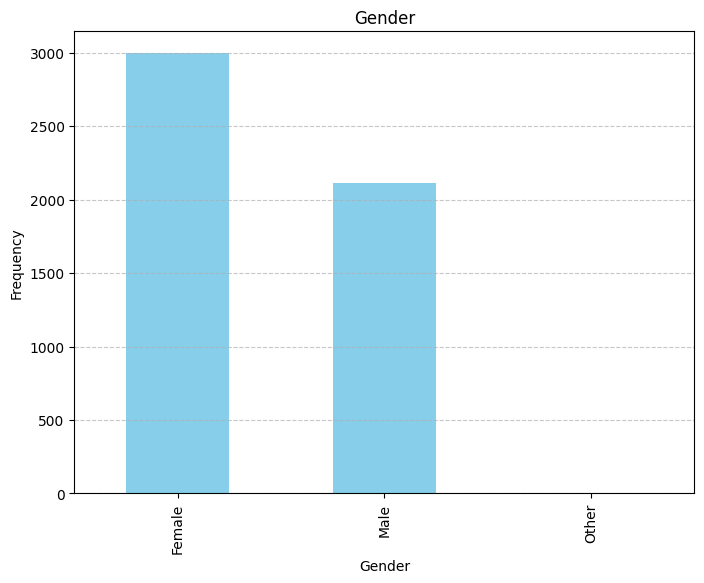

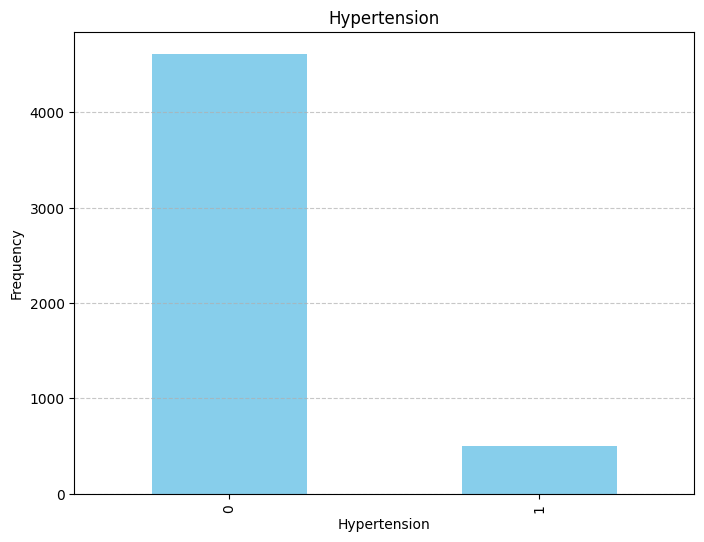

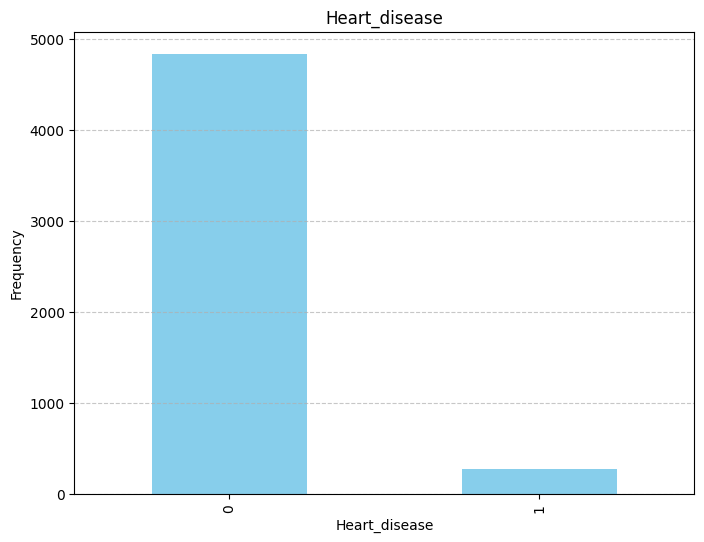

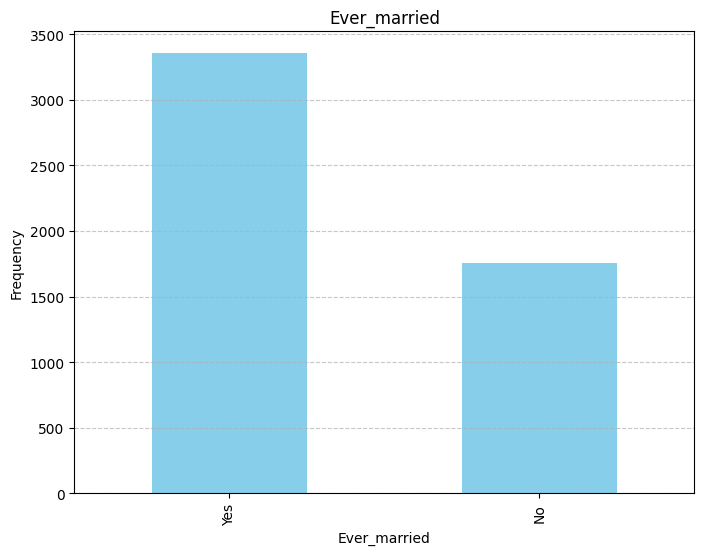

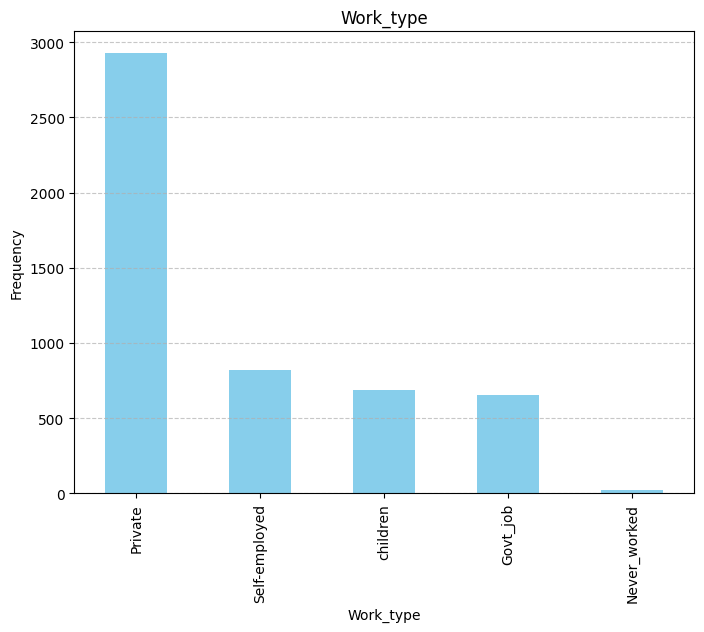

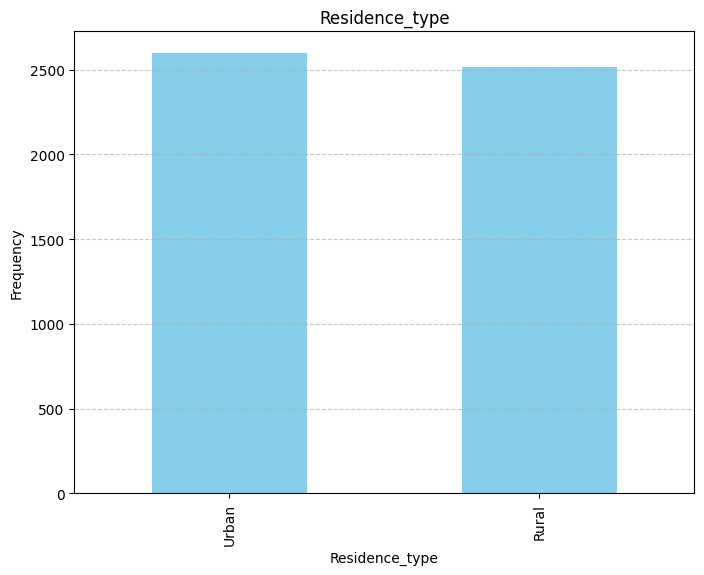

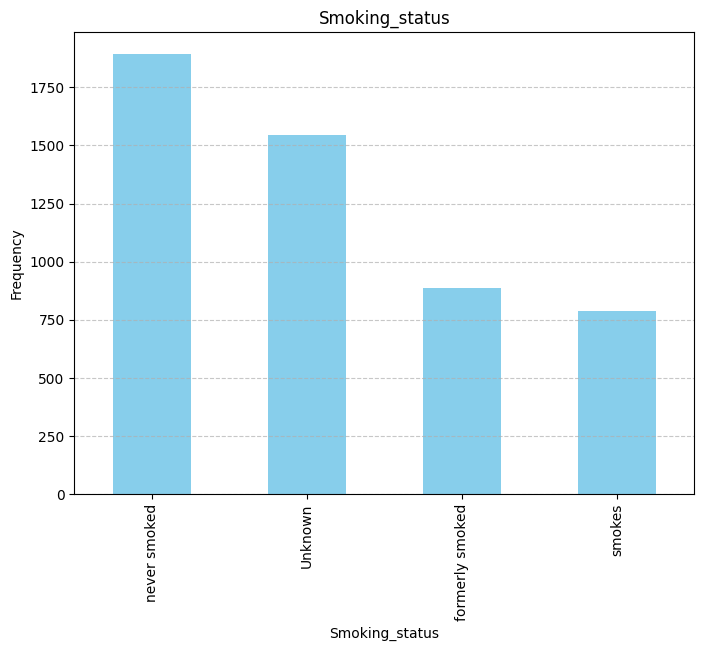

In [216]:
for column in categorical:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(column.capitalize())
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

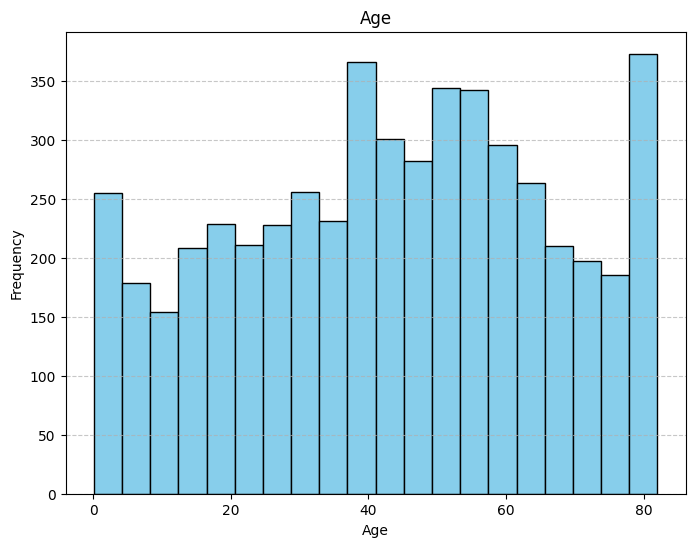

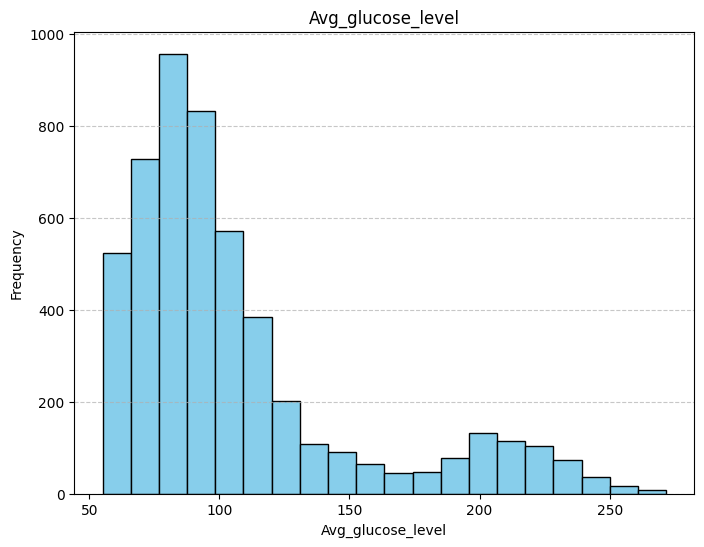

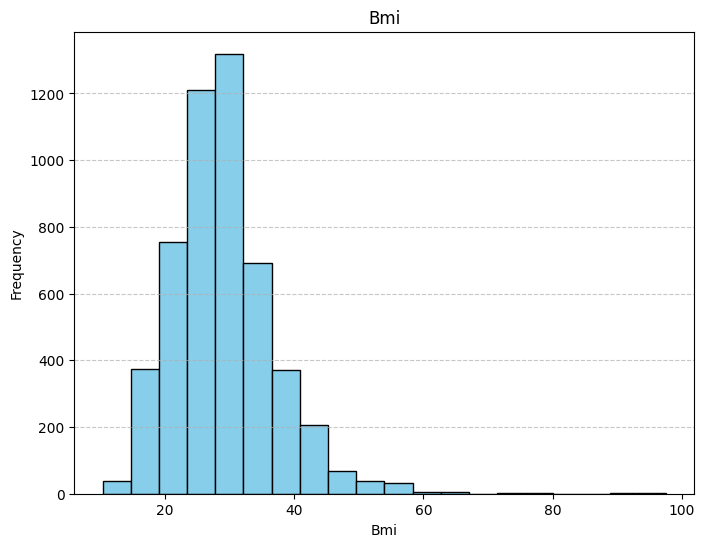

In [217]:
for column in numerical:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column.capitalize())
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

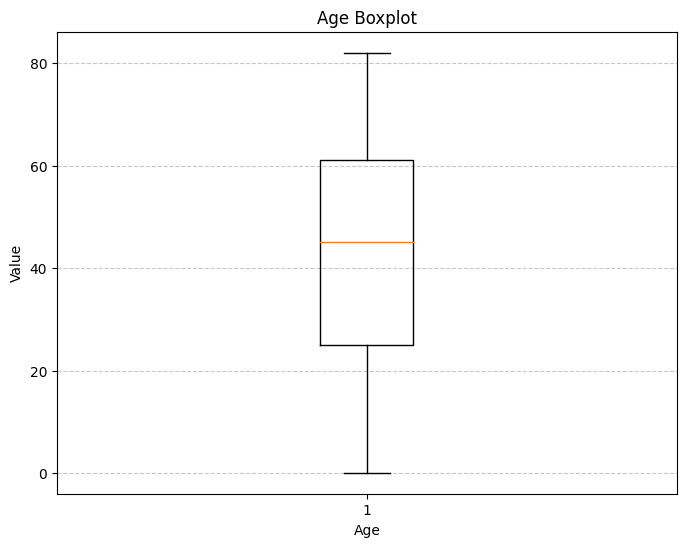

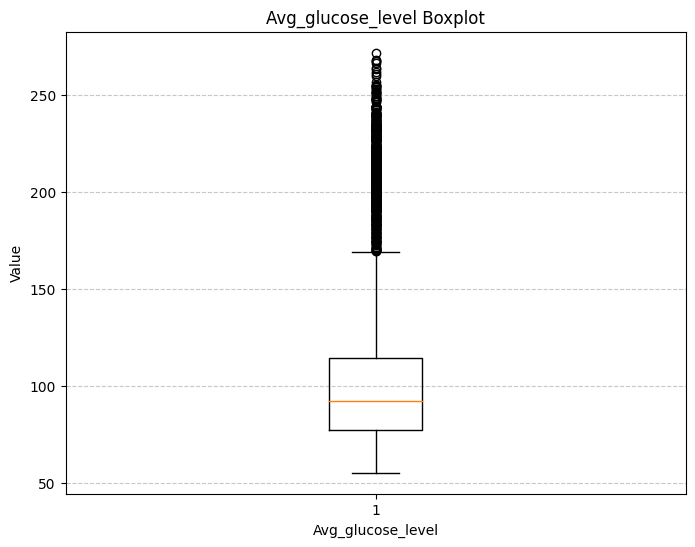

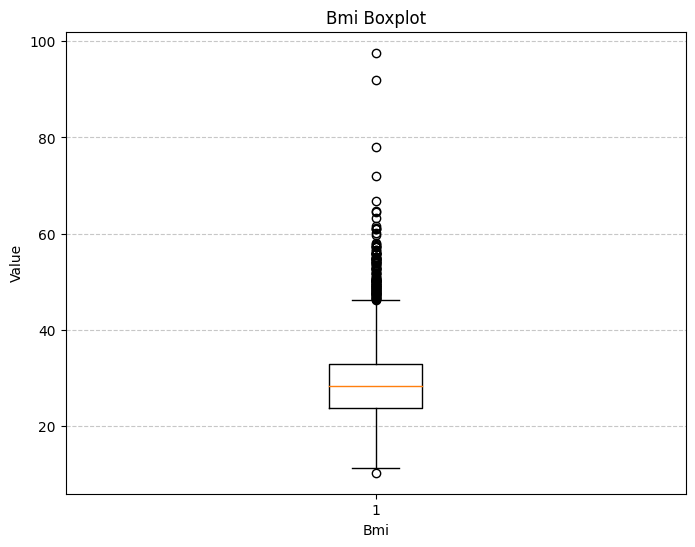

In [218]:
for column in numerical:
    plt.figure(figsize=(8, 6))
    
    plt.boxplot(df[column])
    
    plt.title(f"{column.capitalize()} Boxplot")
    plt.xlabel(column.capitalize())
    plt.ylabel('Value')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [219]:
df = df[df['gender'] != 'Other']
df_encoded = pd.get_dummies(df, columns=['smoking_status', 'work_type'])
label_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
label_encoder = LabelEncoder()
for column in label_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,False,True,False,False,False,False,True,False,False
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,False,False,True,False,False,False,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,False,False,True,False,False,False,True,False,False
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,False,False,False,True,False,False,True,False,False
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,False,False,True,False,False,False,False,True,False
5,56669,1,81.0,0,0,1,1,186.21,29.000000,1,False,True,False,False,False,False,True,False,False
6,53882,1,74.0,1,1,1,0,70.09,27.400000,1,False,False,True,False,False,False,True,False,False
7,10434,0,69.0,0,0,0,1,94.39,22.800000,1,False,False,True,False,False,False,True,False,False
8,27419,0,59.0,0,0,1,0,76.15,28.893237,1,True,False,False,False,False,False,True,False,False
9,60491,0,78.0,0,0,1,1,58.57,24.200000,1,True,False,False,False,False,False,True,False,False


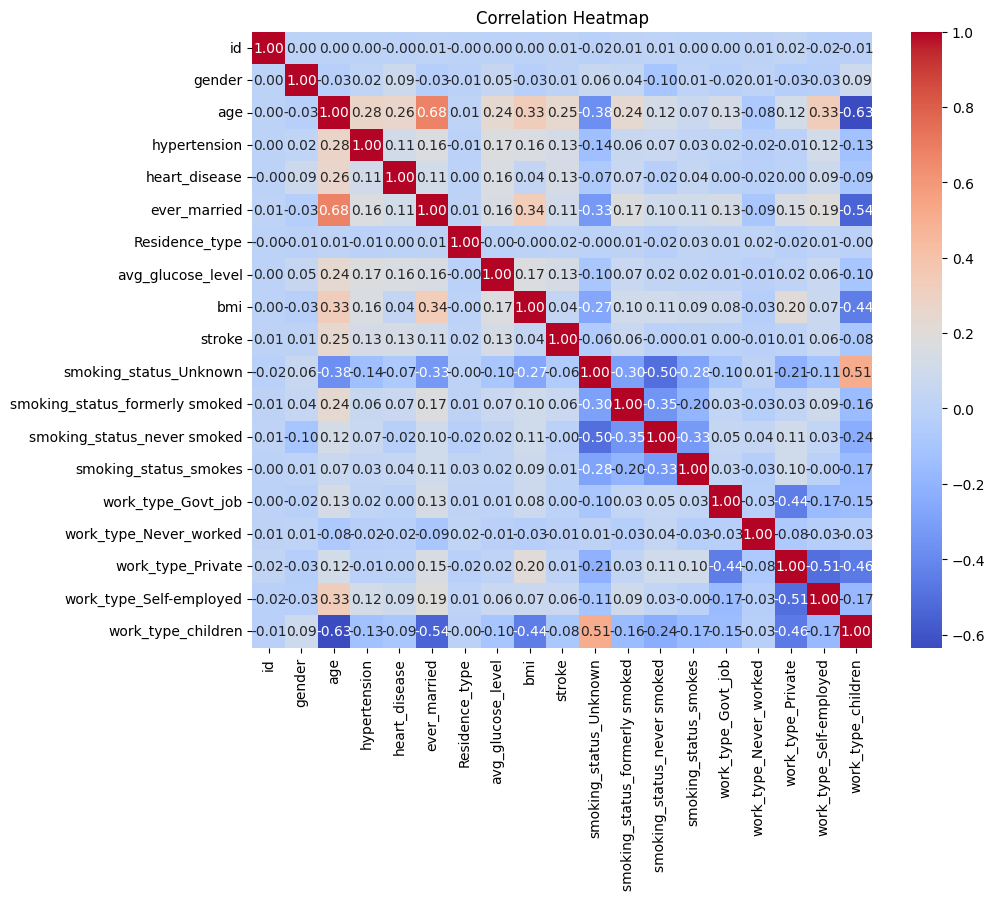

In [220]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [221]:
X = df_encoded.drop('stroke', axis = 1)
y = df_encoded['stroke']

In [222]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train,X_test,y_train,y_test  = train_test_split(X_scaled,
                                              y,
                                              test_size=0.2,
                                              stratify = y,
                                              random_state = 42)

In [223]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [224]:
all_results = pd.DataFrame(columns=['Model','Accuracy', 'Auc', 'Recall', 'Loss'])
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

In [225]:
from sklearn import metrics as mtr
def test_model(model, model_name,X_test, y_test, loss):
    X_test = X_test[:-1]
    y_test = y_test[:-1]
    
    y_pred_proba = model.predict(X_test).flatten()
    y_pred_binary = (y_pred_proba > 0.5).astype(int)
    
    accuracy = mtr.accuracy_score(y_test, y_pred_binary)
    auc = mtr.roc_auc_score(y_test, y_pred_proba)
    recall = mtr.recall_score(y_test, y_pred_binary)
    
    all_results.loc[len(all_results)] =  [model_name, accuracy, auc, recall, loss]

    return accuracy, auc, recall

In [226]:
THRESHOLD = 0.5
def precision(y_true, y_pred, threshold_shift=0.5-THRESHOLD):

    y_pred = tf.keras.backend.clip(y_pred, 0, 1)

    y_pred_bin = tf.keras.backend.round(y_pred + threshold_shift)

    tp = tf.keras.backend.sum(tf.keras.backend.round(y_true * y_pred_bin)) + tf.keras.backend.epsilon()
    fp = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred_bin - y_true, 0, 1)))

    precision = tp / (tp + fp)
    return precision


def recall(y_true, y_pred, threshold_shift=0.5-THRESHOLD):

    y_pred = tf.keras.backend.clip(y_pred, 0, 1)

    y_pred_bin = tf.keras.backend.round(y_pred + threshold_shift)

    tp = tf.keras.backend.sum(tf.keras.backend.round(y_true * y_pred_bin)) + tf.keras.backend.epsilon()
    fn = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true - y_pred_bin, 0, 1)))

    recall = tp / (tp + fn)
    return recall


def fbeta(y_true, y_pred, beta = 2, threshold_shift=0.5-THRESHOLD):   
    y_pred = tf.keras.backend.clip(y_pred, 0, 1)

    y_pred_bin = tf.keras.backend.round(y_pred + threshold_shift)

    tp = tf.keras.backend.sum(tf.keras.backend.round(y_true * y_pred_bin)) + tf.keras.backend.epsilon()
    fp = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred_bin - y_true, 0, 1)))
    fn = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true - y_pred, 0, 1)))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall) 


metrics = [

tf.keras.metrics.TrueNegatives(name = 'tn'),
tf.keras.metrics.FalseNegatives(name = 'fn'),
tf.keras.metrics.TruePositives(name = 'tp'),
tf.keras.metrics.FalsePositives(name = 'fp'),
tf.keras.metrics.Accuracy(name = 'accuracy'),
tf.keras.metrics.Precision(name = 'precision'),
tf.keras.metrics.Recall(name = 'recall'),
tf.keras.metrics.AUC(name = 'auc', curve='PR')
]

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


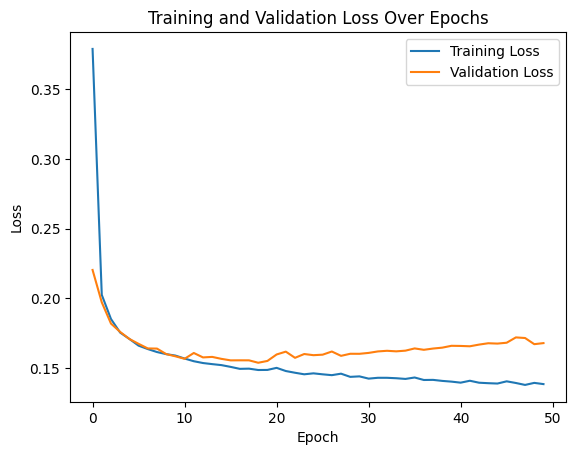

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


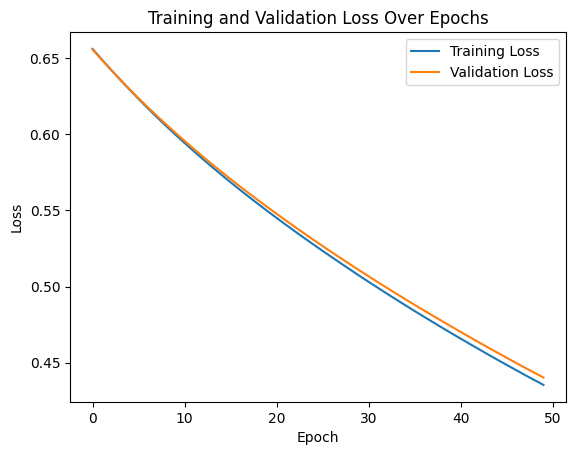

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


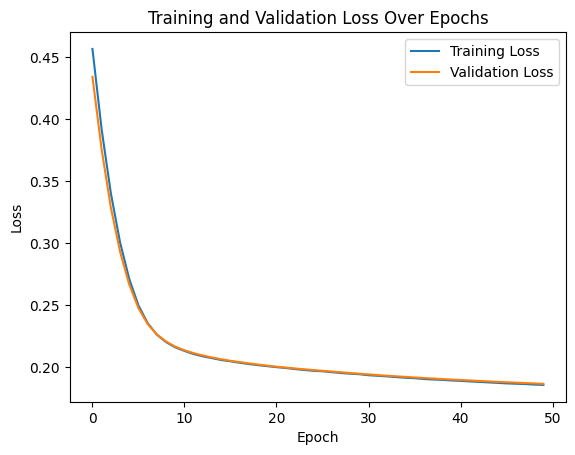

,Model,Accuracy,Auc,Recall,Loss
0,Dense(32) <keras.src.optimizers.adam.Adam obje...,0.951028,0.799156,0.04,0.167978
1,Dense(32) <keras.src.optimizers.sgd.SGD object...,0.951028,0.383646,0.00,0.440211
2,Dense(32) <keras.src.optimizers.adamax.Adamax ...,0.951028,0.669722,0.00,0.186514


In [227]:
optimizers = [tf.optimizers.Adam(learning_rate=0.001), tf.optimizers.SGD(learning_rate=0.0001), tf.optimizers.Adamax(learning_rate=0.0001)]
for opt in optimizers:     
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=metrics)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
    test_model(model, f"Dense(32) {str(opt)}", X_test, y_test,  history.history['val_loss'][-1])
    plot_loss(history)
all_results

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


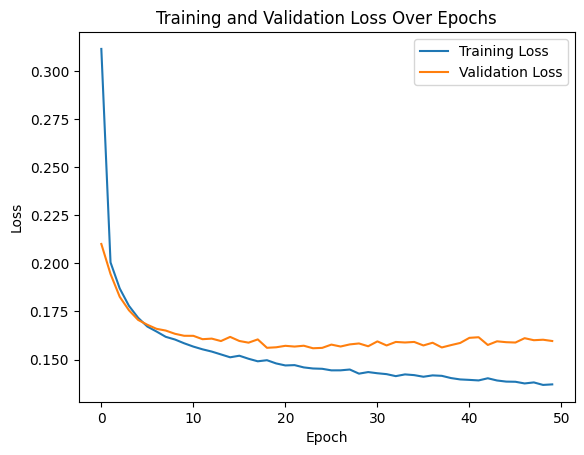

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


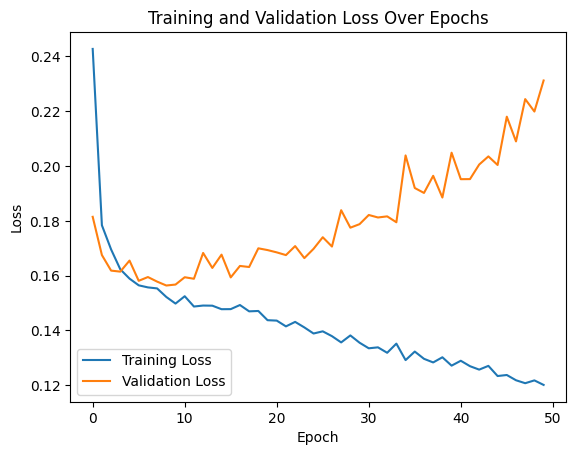

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


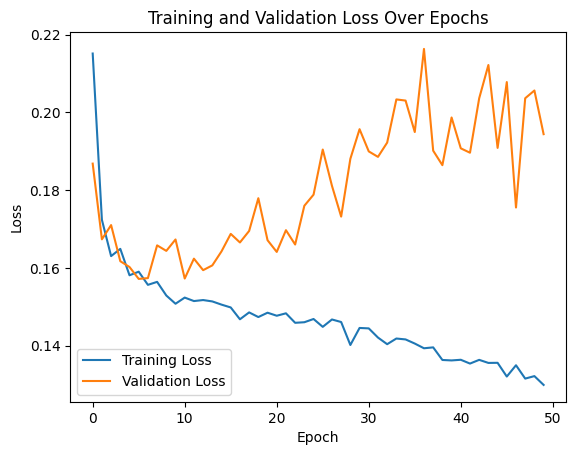

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


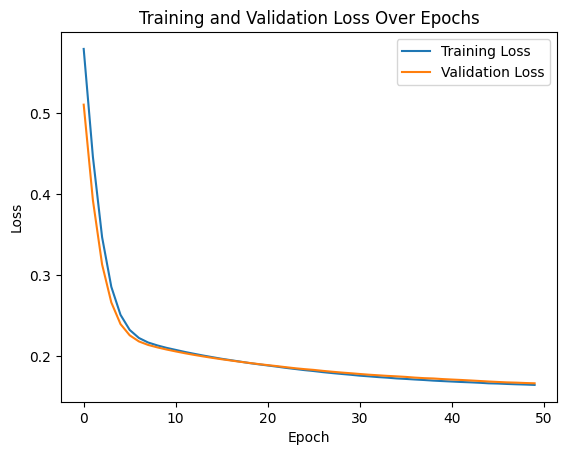

,Model,Accuracy,Auc,Recall,Loss
0,Dense(32) <keras.src.optimizers.adam.Adam obje...,0.951028,0.799156,0.04,0.167978
1,Dense(32) <keras.src.optimizers.sgd.SGD object...,0.951028,0.383646,0.00,0.440211
2,Dense(32) <keras.src.optimizers.adamax.Adamax ...,0.951028,0.669722,0.00,0.186514
3,Dense(32) Adam(0.001),0.952008,0.814706,0.06,0.159648
4,Dense(32) Adam(0.005),0.949070,0.775736,0.02,0.231210
5,Dense(32) Adam(0.01),0.947111,0.749763,0.04,0.194407
6,Dense(32) Adam(0.0001),0.951028,0.794295,0.00,0.166602


In [228]:
learning_rates = [0.001, 0.005, 0.01, 0.0001]

for rate in learning_rates:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer=tf.optimizers.Adam(learning_rate=rate), metrics=metrics)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
    test_model(model, f"Dense(32) Adam({str(rate)})", X_test, y_test,  history.history['val_loss'][-1])
    plot_loss(history)
all_results

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


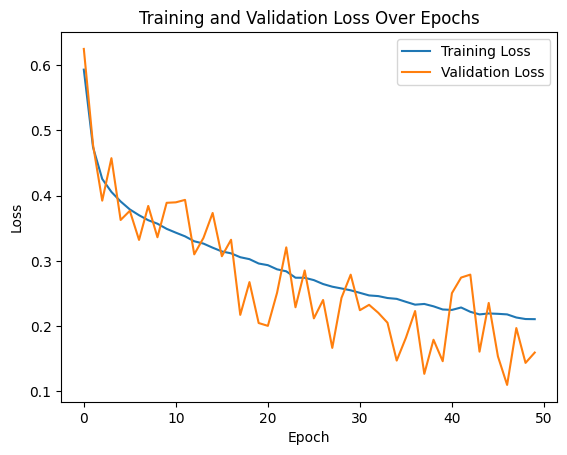

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


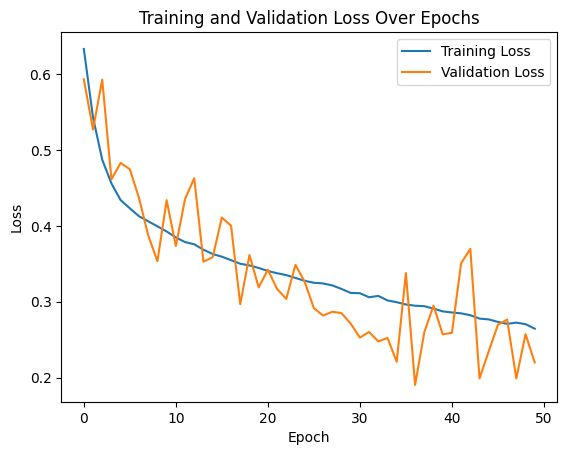

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


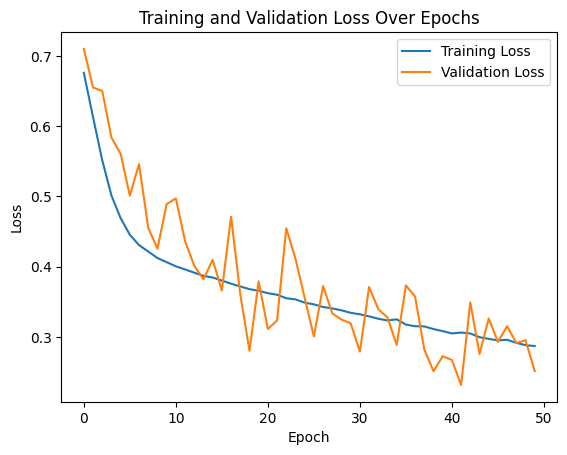

,Model,Accuracy,Auc,Recall,Loss
0,Dense(32) <keras.src.optimizers.adam.Adam obje...,0.951028,0.799156,0.04,0.167978
1,Dense(32) <keras.src.optimizers.sgd.SGD object...,0.951028,0.383646,0.00,0.440211
2,Dense(32) <keras.src.optimizers.adamax.Adamax ...,0.951028,0.669722,0.00,0.186514
3,Dense(32) Adam(0.001),0.952008,0.814706,0.06,0.159648
4,Dense(32) Adam(0.005),0.949070,0.775736,0.02,0.231210
5,Dense(32) Adam(0.01),0.947111,0.749763,0.04,0.194407
6,Dense(32) Adam(0.0001),0.951028,0.794295,0.00,0.166602
7,Dense(32) Adam(0.001) batch_size:32,0.832517,0.725788,0.34,0.159500
8,Dense(32) Adam(0.001) batch_size:64,0.827620,0.756189,0.50,0.219984
9,Dense(32) Adam(0.001) batch_size:128,0.811949,0.780659,0.54,0.251233


In [229]:
batches = [32, 64, 128]
for b in batches:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=metrics)
    history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=b, validation_split=0.1, verbose=0)
    test_model(model, f"Dense(32) Adam(0.001) batch_size:{str(b)}", X_test, y_test,  history.history['val_loss'][-1])
    plot_loss(history)

all_results

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


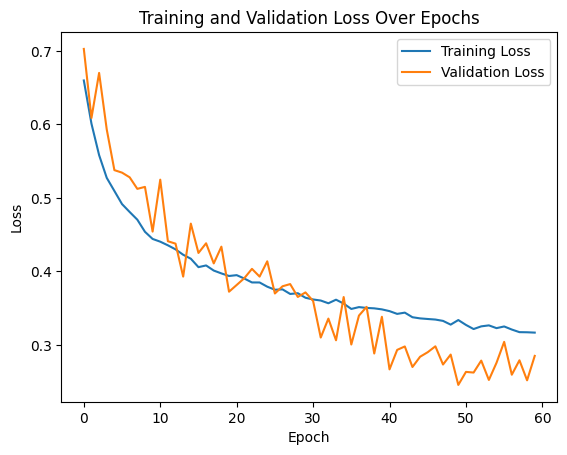

In [230]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=metrics)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_smote, y_train_smote, epochs=300, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
test_model(model, "Dense(32)+Dropout(0.2) Adam(0.001)", X_test, y_test,  history.history['val_loss'][-1])
plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


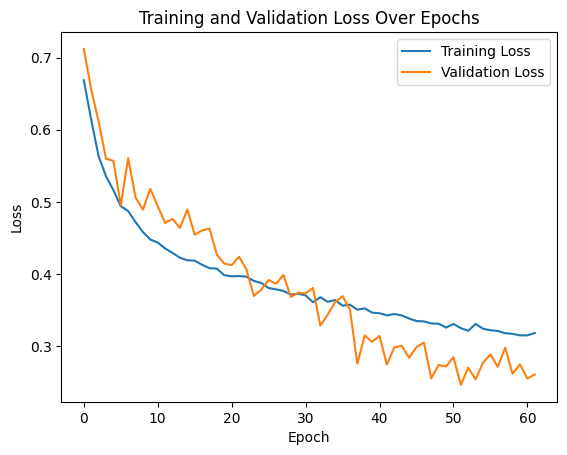

In [231]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=metrics)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_smote, y_train_smote, epochs=300, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
test_model(model, "Dense(32)+2Dropout(0.2) Adam(0.001)", X_test, y_test,  history.history['val_loss'][-1])
plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


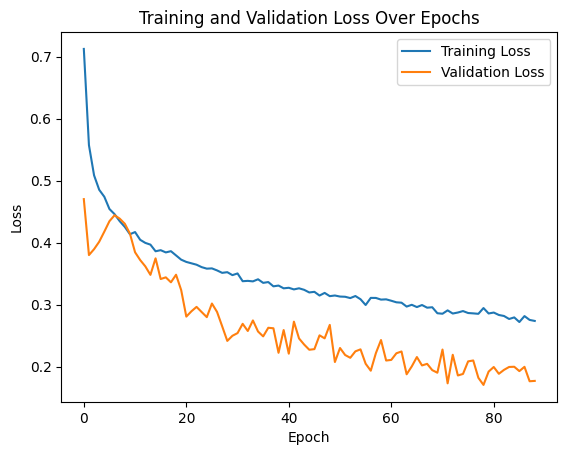

In [232]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=metrics)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_smote, y_train_smote, epochs=300, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
test_model(model, "Dense(32)+Dropout(0.2) Adam(0.001) BatchNorm", X_test, y_test,  history.history['val_loss'][-1])
plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


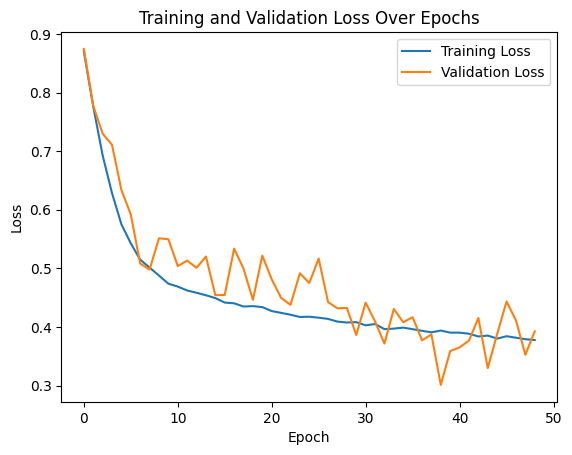

In [233]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=metrics)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_smote, y_train_smote, epochs=300, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
test_model(model, "Dense(32)+2Dropout(0.2) Adam(0.001) r", X_test, y_test,  history.history['val_loss'][-1])
plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


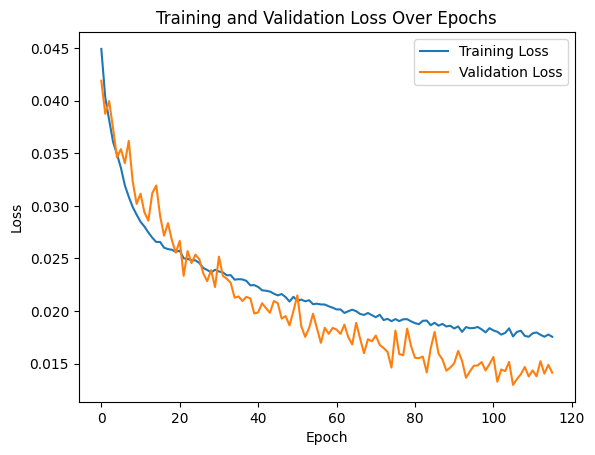

In [234]:
def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(tf.keras.backend.square(y_true), -1) + tf.keras.backend.sum(tf.keras.backend.square(y_pred), -1) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def custom_loss(y_true, y_pred):
    loss = tf.reduce_mean(tf.square(y_true - y_pred)) 
    return loss

def custom_binary_crossentropy(y_true, y_pred):
    class_weights = tf.constant([0.04, 0.96], dtype=tf.float32) 
    y_true = tf.cast(y_true, tf.float32)
    weights = tf.gather(class_weights, tf.cast(y_true, tf.int32))
    loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(labels=y_true, logits=y_pred, pos_weight=weights))
    return loss

def custom_hinge_loss(y_true, y_pred, margin=1):
    y_true_mapped = (2 * y_true) - 1
    loss = tf.keras.backend.maximum(0.0, margin - y_true_mapped * y_pred)
    return tf.keras.backend.mean(loss)

# def focal_loss(targets, inputs, alpha=0.95, gamma=4):    
    
#     inputs = tf.keras.backend.flatten(inputs)
#     targets = tf.keras.backend.flatten(targets)
    
#     BCE = tf.keras.backend.binary_crossentropy(targets, inputs)
#     BCE_EXP = tf.keras.backend.exp(-BCE)
#     focal_loss = tf.keras.backend.mean(alpha * tf.keras.backend.pow((1-BCE_EXP), gamma) * BCE)
    
#     return focal_loss

def focal_loss(y_true, y_pred, gamma=2, alpha=0.25):
    y_true = tf.keras.backend.cast(y_true, dtype='float32')
    y_pred = tf.keras.backend.clip(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
    y_true = tf.keras.backend.clip(y_true, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())

    pt = y_true * y_pred + (1.0 - y_true) * (1.0 - y_pred)
    focal_loss = - alpha * (1.0 - pt) ** gamma * tf.keras.backend.log(pt)

    return tf.keras.backend.mean(focal_loss)
     

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss=focal_loss, optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=metrics)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_smote, y_train_smote, epochs=300, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
test_model(model, "Dense(32)+2Dropout(0.2) Adam(0.001) focal_loss", X_test, y_test,  history.history['val_loss'][-1])
plot_loss(history)

In [235]:
all_results

,Model,Accuracy,Auc,Recall,Loss
0,Dense(32) <keras.src.optimizers.adam.Adam obje...,0.951028,0.799156,0.04,0.167978
1,Dense(32) <keras.src.optimizers.sgd.SGD object...,0.951028,0.383646,0.00,0.440211
2,Dense(32) <keras.src.optimizers.adamax.Adamax ...,0.951028,0.669722,0.00,0.186514
3,Dense(32) Adam(0.001),0.952008,0.814706,0.06,0.159648
4,Dense(32) Adam(0.005),0.949070,0.775736,0.02,0.231210
5,Dense(32) Adam(0.01),0.947111,0.749763,0.04,0.194407
6,Dense(32) Adam(0.0001),0.951028,0.794295,0.00,0.166602
7,Dense(32) Adam(0.001) batch_size:32,0.832517,0.725788,0.34,0.159500
8,Dense(32) Adam(0.001) batch_size:64,0.827620,0.756189,0.50,0.219984
9,Dense(32) Adam(0.001) batch_size:128,0.811949,0.780659,0.54,0.251233


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


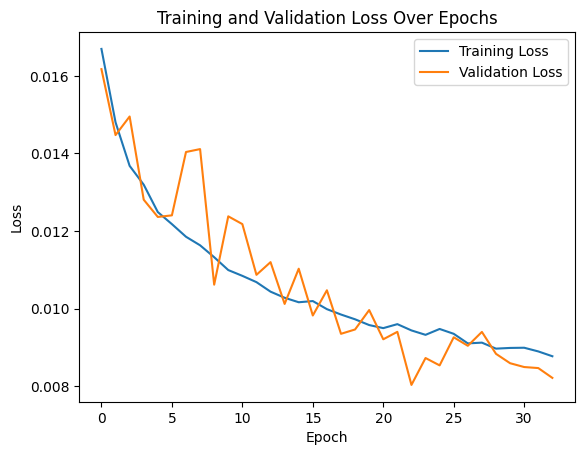

In [236]:
def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(tf.keras.backend.square(y_true), -1) + tf.keras.backend.sum(tf.keras.backend.square(y_pred), -1) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def custom_loss(y_true, y_pred):
    loss = tf.reduce_mean(tf.square(y_true - y_pred)) 
    return loss

def custom_binary_crossentropy(y_true, y_pred):
    class_weights = tf.constant([0.04, 0.96], dtype=tf.float32) 
    y_true = tf.cast(y_true, tf.float32)
    weights = tf.gather(class_weights, tf.cast(y_true, tf.int32))
    loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(labels=y_true, logits=y_pred, pos_weight=weights))
    return loss

def custom_hinge_loss(y_true, y_pred, margin=1):
    y_true_mapped = (2 * y_true) - 1
    loss = tf.keras.backend.maximum(0.0, margin - y_true_mapped * y_pred)
    return tf.keras.backend.mean(loss)

# def focal_loss(targets, inputs, alpha=0.95, gamma=4):    
    
#     inputs = tf.keras.backend.flatten(inputs)
#     targets = tf.keras.backend.flatten(targets)
    
#     BCE = tf.keras.backend.binary_crossentropy(targets, inputs)
#     BCE_EXP = tf.keras.backend.exp(-BCE)
#     focal_loss = tf.keras.backend.mean(alpha * tf.keras.backend.pow((1-BCE_EXP), gamma) * BCE)
    
#     return focal_loss

def focal_loss(y_true, y_pred, gamma=2, alpha=0.1):
    y_true = tf.keras.backend.cast(y_true, dtype='float32')
    y_pred = tf.keras.backend.clip(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
    y_true = tf.keras.backend.clip(y_true, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())

    pt = y_true * y_pred + (1.0 - y_true) * (1.0 - y_pred)
    focal_loss = - alpha * (1.0 - pt) ** gamma * tf.keras.backend.log(pt)

    return tf.keras.backend.mean(focal_loss)
     

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss=focal_loss, optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=metrics)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_smote, y_train_smote, epochs=300, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
test_model(model, "Dense(32)+2Dropout(0.2) Adam(0.001) focal_loss", X_test, y_test,  history.history['val_loss'][-1])
plot_loss(history)

In [237]:
all_results

,Model,Accuracy,Auc,Recall,Loss
0,Dense(32) <keras.src.optimizers.adam.Adam obje...,0.951028,0.799156,0.04,0.167978
1,Dense(32) <keras.src.optimizers.sgd.SGD object...,0.951028,0.383646,0.00,0.440211
2,Dense(32) <keras.src.optimizers.adamax.Adamax ...,0.951028,0.669722,0.00,0.186514
3,Dense(32) Adam(0.001),0.952008,0.814706,0.06,0.159648
4,Dense(32) Adam(0.005),0.949070,0.775736,0.02,0.231210
5,Dense(32) Adam(0.01),0.947111,0.749763,0.04,0.194407
6,Dense(32) Adam(0.0001),0.951028,0.794295,0.00,0.166602
7,Dense(32) Adam(0.001) batch_size:32,0.832517,0.725788,0.34,0.159500
8,Dense(32) Adam(0.001) batch_size:64,0.827620,0.756189,0.50,0.219984
9,Dense(32) Adam(0.001) batch_size:128,0.811949,0.780659,0.54,0.251233
